## Assignment 2


In [1]:
# The following statement will install pandas library. You may need to use pip instead of pip3
# !pip3 install pandas

## import necessary modules
import pandas as pd

data = pd.read_csv(
    filepath_or_buffer= "a1_data.csv", # For Windows, use "\\" instead of "/"
    sep = ",", # comma separated file
    header = 0, # field names in the first line. Index starts with 0 in Python
    encoding = "utf-8", # encoding 
    #parse_dates = [1,33] # If there is any date field, put index (indices) of the field(s)
)

## print first 5 lines. If you need more lines, put the number of lines as an argument
## of the head function
print(data.head(10)) 
print()
print(data.shape) ## show the number of rows and columns

   ADAPPT42  ADHECR42  AGE09X  BMINDX  FAMINC09  TOTEXP09  ASPIRIN  No_ASPIRIN
0         3        10    28.0    26.6    121000      1173        0           1
1         6        10    79.0    34.3     49570     14951        1           0
2         1         8    41.0    31.7    248131      3791        0           1
3         5        10    69.0    25.3     11000     58604        0           1
4         4        10    50.0    28.3     41965      6308        0           1
5         5         5    38.0    28.8     44525       701        0           1
6         6        10    48.0    39.1     13200     60058        1           0
7         2         8    25.0    35.2     35498      2284        0           1
8         2         9    36.0    29.5      9664     15279        0           1
9         2         8    23.0    40.7     18320      1229        0           1

(1058, 8)


In [3]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


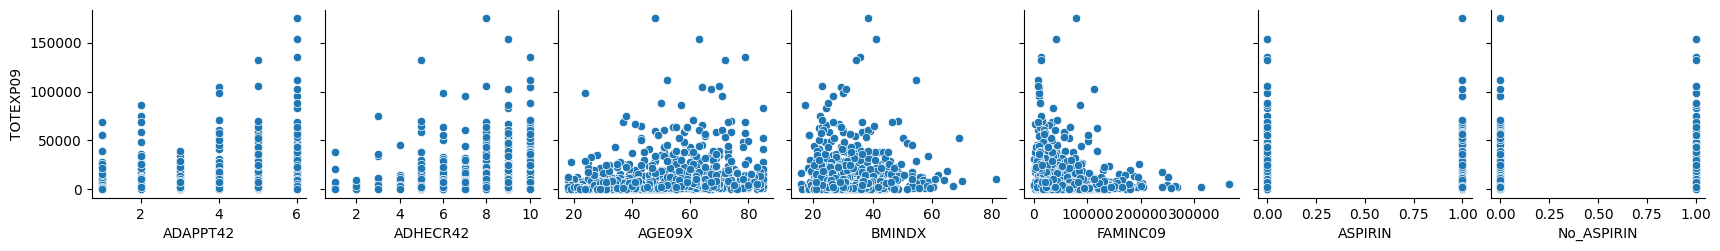

In [4]:

import seaborn as sns

sns.pairplot(data= data,
                  y_vars=["TOTEXP09"],
                  x_vars=["ADAPPT42", "ADHECR42", "AGE09X", "BMINDX", "FAMINC09", "ASPIRIN", "No_ASPIRIN"])

In [5]:
print(data.columns)

Index(['ADAPPT42', 'ADHECR42', 'AGE09X', 'BMINDX', 'FAMINC09', 'TOTEXP09',
       'ASPIRIN', 'No_ASPIRIN'],
      dtype='object')


Coefficients:  [-3.31542011e-01  4.18822898e+01 -1.44819180e+03  2.47040040e+04]


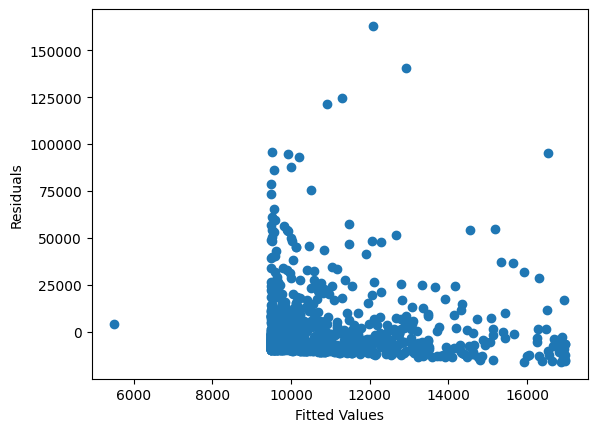

In [6]:
#Explore non linear variables

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# create the predictor variables
x1 = data["BMINDX"].to_numpy()
x2 = data["FAMINC09"].to_numpy()
X = np.column_stack((x1, x2))

# create the response variable
y = data["TOTEXP09"].to_numpy()

# fit the model
coeffs = np.polyfit(x=X[:,0], y=y, deg=3)
fitted_y = coeffs[0]*X[:,0]**3 + coeffs[1]*X[:,0]**2 + coeffs[2]*X[:,0] + coeffs[3]

# print the coefficients
print("Coefficients: ", coeffs)

# calculate the residuals
residuals = y - fitted_y

# create the fitted values vs. residual plot
plt.scatter(fitted_y, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Compute the correlation matrix After New variables
correlations = data.corr()

# Print the correlation matrix
print(correlations)

            ADAPPT42  ADHECR42    AGE09X    BMINDX  FAMINC09  TOTEXP09  \
ADAPPT42    1.000000  0.057417  0.204639  0.084226 -0.092787  0.290435   
ADHECR42    0.057417  1.000000  0.226861  0.003931  0.072280  0.030553   
AGE09X      0.204639  0.226861  1.000000  0.072871 -0.092037  0.253767   
BMINDX      0.084226  0.003931  0.072871  1.000000 -0.139176  0.087044   
FAMINC09   -0.092787  0.072280 -0.092037 -0.139176  1.000000 -0.120311   
TOTEXP09    0.290435  0.030553  0.253767  0.087044 -0.120311  1.000000   
ASPIRIN     0.111434  0.144021  0.418316  0.130306 -0.049229  0.134117   
No_ASPIRIN -0.111434 -0.144021 -0.418316 -0.130306  0.049229 -0.134117   

             ASPIRIN  No_ASPIRIN  
ADAPPT42    0.111434   -0.111434  
ADHECR42    0.144021   -0.144021  
AGE09X      0.418316   -0.418316  
BMINDX      0.130306   -0.130306  
FAMINC09   -0.049229    0.049229  
TOTEXP09    0.134117   -0.134117  
ASPIRIN     1.000000   -1.000000  
No_ASPIRIN -1.000000    1.000000  


<Axes: >

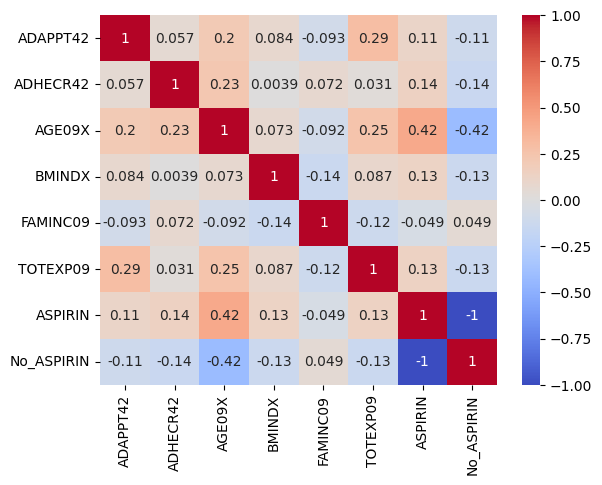

In [9]:
import seaborn as sns

# Plot the correlation matrix as a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# Fine tuning variables


In [10]:

import numpy as np
from sklearn.model_selection import train_test_split

## syntax of numpy where method: np.where(condition, value if condition is true, value if condition is false)
## combine these two variables into one variable depending on their age.
## Sklearn takes integer as label
data["EXPENDITURE"] = np.where(data['TOTEXP09'] >= data['TOTEXP09'].median() , 1 , 0)



data[['TOTEXP09', 'EXPENDITURE', "ADAPPT42", "ADHECR42", "AGE09X", "BMINDX", "FAMINC09", "ASPIRIN", "No_ASPIRIN"]].head(20)





,TOTEXP09,EXPENDITURE,ADAPPT42,ADHECR42,AGE09X,BMINDX,FAMINC09,ASPIRIN,No_ASPIRIN
0,1173,0,3,10,28.0,26.6,121000,0,1
1,14951,1,6,10,79.0,34.3,49570,1,0
2,3791,0,1,8,41.0,31.7,248131,0,1
3,58604,1,5,10,69.0,25.3,11000,0,1
4,6308,1,4,10,50.0,28.3,41965,0,1
5,701,0,5,5,38.0,28.8,44525,0,1
6,60058,1,6,10,48.0,39.1,13200,1,0
7,2284,0,2,8,25.0,35.2,35498,0,1
8,15279,1,2,9,36.0,29.5,9664,0,1
9,1229,0,2,8,23.0,40.7,18320,0,1


# Creating new variables and trying out combinations

In [11]:
data["ADAPPTVISIT"] = np.where(data['ADAPPT42'] >= 1, data['ADAPPT42'], 0)
#data["ADAPPTVISIT"] = np.where(data['ADAPPT42'] >= data['ADAPPT42'].median() , 1 , 0)

data["RATING"] = np.where(data['ADHECR42'] >= data['ADHECR42'].median() , 1 , 0)
data["LOWINCOME"] = np.where(data['FAMINC09'] >= data['FAMINC09'].median() , 1 , 0)
data["LOWBMI"] = np.where(data['BMINDX'] >= data['BMINDX'].mean() , 1 , 0)
data["AGEHIGH"] = np.where(data['AGE09X'] >= data['AGE09X'].median() , 1 , 0)

## I did not use all of these new variables, I included these just for reference and to show my attempts

In [12]:
data["AGEASP"] = (data['AGE09X'] * data['ASPIRIN']) 


In [13]:
data["AGEASP2"] = (data['AGE09X'] * data['No_ASPIRIN']) 

In [14]:
data["SPEND"] = (data['FAMINC09'] * data['TOTEXP09']) 

In [15]:
data["AGEAPP"] = (data['AGE09X'] * data['ADAPPTVISIT']) 

In [16]:
data["AGECR"] = (data['AGE09X'] * data['ADHECR42']) 

In [17]:
data["BMAGE"] = (data['AGE09X'] * data['BMINDX'])

In [18]:
data["BMASP"] = (data['BMINDX'] * data['ASPIRIN'])

In [19]:
data["BMFAM"] = (data['FAMINC09'] * data['BMINDX'])

In [20]:
data["AGEASP"] = (data['AGE09X'] * data['No_ASPIRIN'])

In [21]:
#This is just for refernce, so I can see data frame with the variables I am interesed in

data[['ADAPPTVISIT', 'EXPENDITURE', "ADAPPT42", "ADHECR42", "AGE09X", "BMINDX", "FAMINC09", "ASPIRIN","AGEASP", "AGEASP2","AGEAPP", "BMAGE", "No_ASPIRIN"]].head(20)


,ADAPPTVISIT,EXPENDITURE,ADAPPT42,ADHECR42,AGE09X,BMINDX,FAMINC09,ASPIRIN,AGEASP,AGEASP2,AGEAPP,BMAGE,No_ASPIRIN
0,3,0,3,10,28.0,26.6,121000,0,28.0,28.0,84.0,744.8,1
1,6,1,6,10,79.0,34.3,49570,1,0.0,0.0,474.0,2709.7,0
2,1,0,1,8,41.0,31.7,248131,0,41.0,41.0,41.0,1299.7,1
3,5,1,5,10,69.0,25.3,11000,0,69.0,69.0,345.0,1745.7,1
4,4,1,4,10,50.0,28.3,41965,0,50.0,50.0,200.0,1415.0,1
5,5,0,5,5,38.0,28.8,44525,0,38.0,38.0,190.0,1094.4,1
6,6,1,6,10,48.0,39.1,13200,1,0.0,0.0,288.0,1876.8,0
7,2,0,2,8,25.0,35.2,35498,0,25.0,25.0,50.0,880.0,1
8,2,1,2,9,36.0,29.5,9664,0,36.0,36.0,72.0,1062.0,1
9,2,0,2,8,23.0,40.7,18320,0,23.0,23.0,46.0,936.1,1


In [22]:
#Here, I am droping this variable as I opt out to only use the new variable: ADAPPTVISIT 
data = data.drop('ADAPPT42',  axis=1)


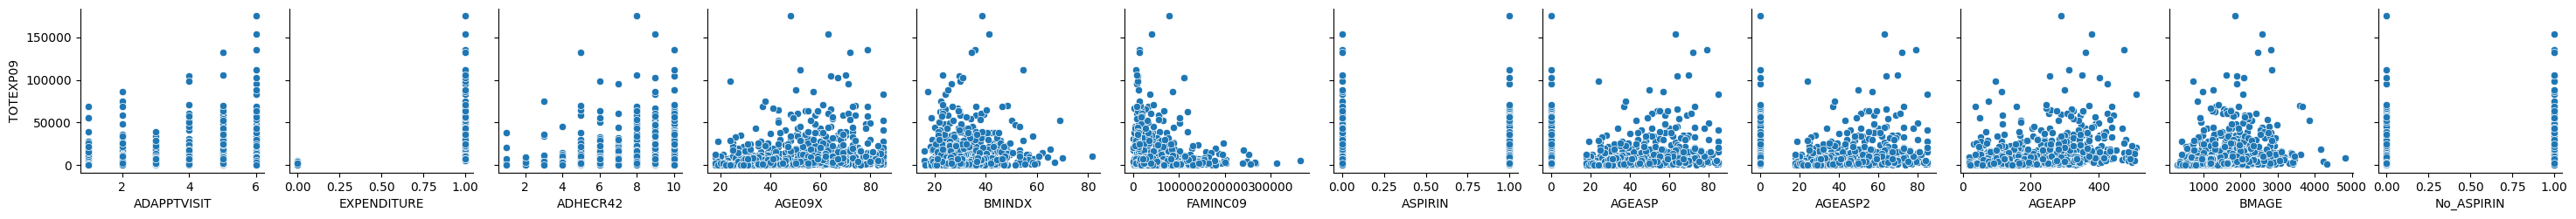

In [23]:
import seaborn as sns

#I did not drop the TOTEXP09 because I wanted to see the pairplot with my new variables. 
#I dropped in the next code block

sns.pairplot(data= data,
                  y_vars=["TOTEXP09"],
                  x_vars=['ADAPPTVISIT', 'EXPENDITURE', "ADHECR42", "AGE09X", "BMINDX", "FAMINC09", "ASPIRIN","AGEASP", "AGEASP2","AGEAPP", "BMAGE", "No_ASPIRIN"])

In [24]:
#Dropping TOTEXP09

#data = data.drop('TOTEXP09',  axis=1)


In [25]:
## independent variables - These are the once that I chose for my final model

X = data.loc[:, ["ADAPPTVISIT","AGE09X", "BMINDX","FAMINC09", 
                 "AGEASP2", "AGEAPP", "ADHECR42", "BMAGE","AGEASP"]]


In [26]:
## dependent variable
## Specify the data type. Before specifying, the type was unknown
##Selecting a random state
y = data["EXPENDITURE"].astype('int')

print(X.head())
print(y.head())


## test_size will set the ratio of the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

   ADAPPTVISIT  AGE09X  BMINDX  FAMINC09  AGEASP2  AGEAPP  ADHECR42   BMAGE  \
0            3    28.0    26.6    121000     28.0    84.0        10   744.8   
1            6    79.0    34.3     49570      0.0   474.0        10  2709.7   
2            1    41.0    31.7    248131     41.0    41.0         8  1299.7   
3            5    69.0    25.3     11000     69.0   345.0        10  1745.7   
4            4    50.0    28.3     41965     50.0   200.0        10  1415.0   

   AGEASP  
0    28.0  
1     0.0  
2    41.0  
3    69.0  
4    50.0  
0    0
1    1
2    0
3    1
4    1
Name: EXPENDITURE, dtype: int32
(740, 9)
(318, 9)
(740,)
(318,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Create a model
a_model = LogisticRegression(penalty='l1', C=.01, solver='liblinear')

a_model.fit(X_train, y_train)

## predict target class based on the trained model 
predictions = a_model.predict(X_test)

## Calculate accuracy of the classifier
accuracy = accuracy_score(predictions, y_test)

print("Accuracy:", accuracy)

## Calculate precision of the classifier
precision = precision_score(y_pred = predictions, y_true = y_test, pos_label = 1)


print("Precision:", precision)

## Calculate recall of the classifier
recall = recall_score(y_pred = predictions, y_true = y_test, pos_label = 1)

print("Recall:", recall)


Accuracy: 0.7232704402515723
Precision: 0.7575757575757576
Recall: 0.6410256410256411


In [28]:
from sklearn.metrics import f1_score

## predict target class based on the trained model 
predictions = a_model.predict(X_test)

## Calculate F1-score of the classifier
f1score = f1_score(y_test, predictions)

print("F1-score:", f1score)

F1-score: 0.6944444444444444


In [29]:
#Double checking that the intended variables were chosen for the model run. 

print(X_train)

     ADAPPTVISIT  AGE09X  BMINDX  FAMINC09  AGEASP2  AGEAPP  ADHECR42   BMAGE  \
834            4    52.0    39.1      9022      0.0   208.0         6  2033.2   
944            5    65.0    26.5     57588      0.0   325.0         8  1722.5   
596            3    73.0    29.5     39700     73.0   219.0         9  2153.5   
874            1    40.0    27.1     96950     40.0    40.0         7  1084.0   
936            4    60.0    23.2    133427      0.0   240.0         8  1392.0   
..           ...     ...     ...       ...      ...     ...       ...     ...   
176            5    64.0    36.6    102865     64.0   320.0         8  2342.4   
449            6    68.0    33.3     70130     68.0   408.0         9  2264.4   
55             6    56.0    29.2     60000      0.0   336.0         8  1635.2   
919            4    78.0    55.4      6950      0.0   312.0         9  4321.2   
641            5    46.0    25.8    140812      0.0   230.0         8  1186.8   

     AGEASP  
834     0.0  

In [30]:
pd.crosstab(index=y_test, columns=predictions)

col_0,0,1
EXPENDITURE,,
0,130,32
1,56,100


## Adjusting my A1 model to get a better recall - Modified A1

In [31]:
## independent variables - I tried dropping FAMINCO, but it did not improve recall
## Dropping BMINDX improves recall
## Dropping AGEAPP gave a good boost to recall
## Dropping AGEASP gave a good boost to recall as well
## Dropped AGEASP2 as well - slight increase in recall
## Dropping BMAGE as well

## I am also dropping some variables in order to improve the recall since I identified that as a more important metric

C = data.loc[:, ["ADAPPTVISIT","AGE09X", "FAMINC09", 
                  "ADHECR42"]]


In [32]:
## dependent variable
## Specify the data type. Before specifying, the type was unknown
##Selecting a random state
d = data["EXPENDITURE"].astype('int')

print(C.head())
print(d.head())


## test_size will set the ratio of the test dataset
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.3, random_state=99)

print(C_train.shape)
print(C_test.shape)
print(d_train.shape)
print(d_test.shape)

   ADAPPTVISIT  AGE09X  FAMINC09  ADHECR42
0            3    28.0    121000        10
1            6    79.0     49570        10
2            1    41.0    248131         8
3            5    69.0     11000        10
4            4    50.0     41965        10
0    0
1    1
2    0
3    1
4    1
Name: EXPENDITURE, dtype: int32
(740, 4)
(318, 4)
(740,)
(318,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Create a model
a2_model = LogisticRegression(penalty='l1', C=.01, solver='liblinear')

a2_model.fit(C_train, d_train)

## predict target class based on the trained model 
predictions = a2_model.predict(C_test)

## Calculate accuracy of the classifier
accuracy = accuracy_score(predictions, d_test)

print("Accuracy:", accuracy)

## Calculate precision of the classifier
precision = precision_score(d_test, predictions, pos_label=1)

print("Precision:", precision)

## Calculate recall of the classifier

recall = recall_score(d_test, predictions, pos_label=1)


print("Recall:", recall)


Accuracy: 0.6572327044025157
Precision: 0.6180904522613065
Recall: 0.7884615384615384


In [34]:
from sklearn.metrics import f1_score

## predict target class based on the trained model 
predictions = a2_model.predict(C_test)

## Calculate F1-score of the classifier
f1score = f1_score(d_test, predictions)

print("F1-score:", f1score)

F1-score: 0.6929577464788732


In [35]:
#Double checking that the intended variables were chosen for the model run. 

print(C_train)

     ADAPPTVISIT  AGE09X  FAMINC09  ADHECR42
834            4    52.0      9022         6
944            5    65.0     57588         8
596            3    73.0     39700         9
874            1    40.0     96950         7
936            4    60.0    133427         8
..           ...     ...       ...       ...
176            5    64.0    102865         8
449            6    68.0     70130         9
55             6    56.0     60000         8
919            4    78.0      6950         9
641            5    46.0    140812         8

[740 rows x 4 columns]


In [36]:
pd.crosstab(index=d_test, columns=predictions)

col_0,0,1
EXPENDITURE,,
0,86,76
1,33,123


# Baseline Model

In [37]:
# The following statement will install pandas library. You may need to use pip instead of pip3
# !pip3 install pandas

## import necessary modules
import pandas as pd

data = pd.read_csv(
    filepath_or_buffer= "a1_data.csv", # For Windows, use "\\" instead of "/"
    sep = ",", # comma separated file
    header = 0, # field names in the first line. Index starts with 0 in Python
    encoding = "utf-8", # encoding 
    #parse_dates = [1,33] # If there is any date field, put index (indices) of the field(s)
)

## print first 5 lines. If you need more lines, put the number of lines as an argument
## of the head function
print(data.head(10)) 
print()
print(data.shape) ## show the number of rows and columns

   ADAPPT42  ADHECR42  AGE09X  BMINDX  FAMINC09  TOTEXP09  ASPIRIN  No_ASPIRIN
0         3        10    28.0    26.6    121000      1173        0           1
1         6        10    79.0    34.3     49570     14951        1           0
2         1         8    41.0    31.7    248131      3791        0           1
3         5        10    69.0    25.3     11000     58604        0           1
4         4        10    50.0    28.3     41965      6308        0           1
5         5         5    38.0    28.8     44525       701        0           1
6         6        10    48.0    39.1     13200     60058        1           0
7         2         8    25.0    35.2     35498      2284        0           1
8         2         9    36.0    29.5      9664     15279        0           1
9         2         8    23.0    40.7     18320      1229        0           1

(1058, 8)


# # # I changed X and y with A and b so I can show the two different models without clashing

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

## combine these two variables into one variable depending on their age.
## Sklearn takes integer as label
data["EXPENDITURE"] = np.where(data['TOTEXP09'] >= data['TOTEXP09'].median(), 1, 0)
data = data.drop('TOTEXP09', axis=1)

## independent variables
A = data.loc[:, data.columns != "EXPENDITURE"]

## dependent variable
## Specify the data type. Before specifying, the type was unknown
b = data["EXPENDITURE"].astype('int')

## test_size will set the ratio of the test dataset
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=99)

## Create a model
b_model = LogisticRegression(penalty='l1', C=.01, solver='liblinear')
b_model.fit(A_train, b_train)

## predict target class based on the trained model 
predictions = b_model.predict(A_test)

## Calculate accuracy of the classifier
accuracy = accuracy_score(b_test, predictions)
print("Accuracy:", accuracy)

## Calculate precision of the classifier
precision = precision_score(b_test, predictions, pos_label=1)
print("Precision:", precision)

## Calculate recall of the classifier
recall = recall_score(b_test, predictions, pos_label=1)
print("Recall:", recall)


Accuracy: 0.6477987421383647
Precision: 0.6170212765957447
Recall: 0.7435897435897436


In [39]:
pd.crosstab(index=b_test, columns=predictions)

col_0,0,1
EXPENDITURE,,
0,90,72
1,40,116


# F-Measure for My Original Model

In [40]:
from sklearn.metrics import f1_score

## predict target class based on the trained model 
predictions = a_model.predict(X_test)

## Calculate F1-score of the classifier
f1score = f1_score(y_test, predictions)

print("F1-score:", f1score)

F1-score: 0.6944444444444444


In [41]:
## Calculate accuracy of the classifier
accuracy = accuracy_score(predictions, y_test)

print("Accuracy:", accuracy)

## Calculate precision of the classifier
precision = precision_score(y_pred = predictions, y_true = y_test, pos_label = 1)

print("Precision:", precision)

## Calculate recall of the classifier
recall = recall_score(y_pred = predictions, y_true = y_test, pos_label = 1)

print("Recall:", recall)

Accuracy: 0.7232704402515723
Precision: 0.7575757575757576
Recall: 0.6410256410256411


# F-Measure for Baseline Model

In [42]:
from sklearn.metrics import f1_score

## predict target class based on the trained model 
predictions = b_model.predict(A_test)

## Calculate F1-score of the classifier
f1score = f1_score(b_test, predictions)

print("F1-score:", f1score)

F1-score: 0.6744186046511628


In [43]:
## predict target class based on the trained model 
predictions = b_model.predict(A_test)

## Calculate accuracy of the classifier
accuracy = accuracy_score(b_test, predictions)
print("Accuracy:", accuracy)

## Calculate precision of the classifier
precision = precision_score(b_test, predictions, pos_label=1)
print("Precision:", precision)

## Calculate recall of the classifier
recall = recall_score(b_test, predictions, pos_label=1)
print("Recall:", recall)


Accuracy: 0.6477987421383647
Precision: 0.6170212765957447
Recall: 0.7435897435897436


# N-Fold Validation

## For my original A1 model

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
a_model = LogisticRegression()

# evaluate model
scores_LR = cross_val_score(a_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
precision_LR = cross_val_score(a_model, X, y, scoring='precision', cv=cv, n_jobs=-1)
recall_LR = cross_val_score(a_model, X, y, scoring='recall', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_LR), std(scores_LR)))
print('Precision: %.3f (%.3f)' % (mean(precision_LR), std(precision_LR)))
print('Recall: %.3f (%.3f)' % (mean(recall_LR), std(recall_LR)))


Accuracy: 0.697 (0.057)
Precision: 0.713 (0.098)
Recall: 0.653 (0.075)


# For my modified A1 model to improve recall

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
c_model = LogisticRegression()

# evaluate model
scores_LR3 = cross_val_score(c_model, C, d, scoring='accuracy', cv=cv, n_jobs=-1)
precision_LR3 = cross_val_score(c_model, C, d, scoring='precision', cv=cv, n_jobs=-1)
recall_LR3 = cross_val_score(c_model, C, d, scoring='recall', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_LR3), std(scores_LR3)))
print('Precision: %.3f (%.3f)' % (mean(precision_LR3), std(precision_LR3)))
print('Recall: %.3f (%.3f)' % (mean(recall_LR3), std(recall_LR3)))


Accuracy: 0.589 (0.063)
Precision: 0.567 (0.060)
Recall: 0.777 (0.070)


# For the Baseline model

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
b_model = LogisticRegression()

# evaluate model
scores_LR2 = cross_val_score(b_model, A, b, scoring='accuracy', cv=cv, n_jobs=-1)
precision_LR2 = cross_val_score(b_model, A, b, scoring='precision', cv=cv, n_jobs=-1)
recall_LR2 = cross_val_score(b_model, A, b, scoring='recall', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_LR2), std(scores_LR2)))
print('Precision: %.3f (%.3f)' % (mean(precision_LR2), std(precision_LR2)))
print('Recall: %.3f (%.3f)' % (mean(recall_LR2), std(recall_LR2)))


Accuracy: 0.648 (0.037)
Precision: 0.638 (0.048)
Recall: 0.689 (0.051)


In [47]:
print(scores_LR)
print(scores_LR2)
print(scores_LR3)

[0.58490566 0.71698113 0.76415094 0.77358491 0.69811321 0.67924528
 0.62264151 0.66981132 0.74285714 0.71428571]
[0.61320755 0.63207547 0.60377358 0.66037736 0.68867925 0.62264151
 0.6509434  0.63207547 0.64761905 0.73333333]
[0.5        0.64150943 0.60377358 0.67924528 0.54716981 0.51886792
 0.5754717  0.53773585 0.59047619 0.6952381 ]


# Comparing My Original A1 Accuracy to baseline


In [48]:
scores_LR - scores_LR2

array([-0.02830189,  0.08490566,  0.16037736,  0.11320755,  0.00943396,
        0.05660377, -0.02830189,  0.03773585,  0.0952381 , -0.01904762])

In [49]:
diff = mean(scores_LR - scores_LR2)

print(diff)

0.0481850853548967


In [50]:
T = list()
folds = 10
N = 100000


In [51]:
# Step 1: sample 10 folds (with replacement) from our set of 10 folds (called a subsample)

import random

for i in range(N):
    num_of_folds = list()

    for i in range(folds):
        num_of_folds.append(random.randint(0, folds-1))

    T.append(mean(scores_LR[num_of_folds] - scores_LR2[num_of_folds]))

In [52]:
T

[0.08113207547169815,
 0.0453369272237197,
 0.07641509433962267,
 0.07469002695417792,
 0.05856244384546274,
 0.06336927223719678,
 0.059595687331536404,
 0.011374663072776292,
 0.02650494159928124,
 0.04250673854447443,
 0.05863432165318962,
 0.03867924528301888,
 0.06895777178796048,
 0.019811320754716987,
 0.05941599281221925,
 0.028283917340521124,
 0.06619946091644206,
 0.049038634321653216,
 0.04252470799640613,
 0.04337825696316263,
 0.02262353998203056,
 0.03967654986522913,
 0.07743036837376463,
 0.03778975741239893,
 0.04555256064690026,
 0.07176999101527406,
 0.04433962264150944,
 0.036738544474393564,
 0.06329739442946994,
 0.060377358490566045,
 0.08513926325247083,
 0.030170709793351312,
 0.057619047619047625,
 0.028373764600179707,
 0.06790655884995511,
 0.0642228212039533,
 0.06327942497753822,
 0.04716981132075472,
 0.10386343216531899,
 0.038751123090745763,
 0.025561545372866135,
 0.034016172506738565,
 0.04820305480682839,
 0.03780772686433066,
 0.028301886792452845

In [53]:
mean(T)

0.04813264375561548

In [54]:
T_new = T - mean(T)

print(T_new)

[ 0.03299943 -0.00279572  0.02828245 ...  0.00496709 -0.01322698
  0.00099584]


In [55]:
larger_elements = [element for element in T_new if element > diff]
p_value = len(larger_elements) / N

print(p_value)

0.00683


# Comparing my Modified A1 Accuracy to baseline

In [56]:
scores_LR3 - scores_LR2

array([-0.11320755,  0.00943396,  0.        ,  0.01886792, -0.14150943,
       -0.10377358, -0.0754717 , -0.09433962, -0.05714286, -0.03809524])

In [57]:
diff = mean(scores_LR3 - scores_LR2)

print(diff)

-0.059523809523809514


In [58]:
T2 = list()
folds = 10
N = 100000


In [59]:
# Step 1: sample 10 folds (with replacement) from our set of 10 folds (called a subsample)

import random

for i in range(N):
    num_of_folds = list()

    for i in range(folds):
        num_of_folds.append(random.randint(0, folds-1))

    T2.append(mean(scores_LR[num_of_folds] - scores_LR2[num_of_folds]))

In [60]:
T2

[0.07176999101527406,
 0.07282120395327943,
 0.05195867026055708,
 0.0480772686433064,
 0.01132075471698114,
 0.03318059299191375,
 0.05658580413297397,
 0.04149146451033246,
 0.032057502246181514,
 0.03506738544474395,
 0.03599281221922733,
 0.020808625336927254,
 0.03118598382749329,
 0.09546271338724173,
 0.048167115902964984,
 0.01788858939802338,
 0.015965858041329783,
 0.04820305480682839,
 0.1029200359389039,
 0.08027852650494162,
 0.04537286612758311,
 0.056783468104222835,
 0.050143755615453756,
 0.03401617250673857,
 0.053863432165318983,
 0.06525606469002697,
 0.043450134770889506,
 0.059613656783468104,
 0.02458221024258762,
 0.07735849056603776,
 0.0509074573225517,
 0.05573225516621746,
 0.050161725067385476,
 0.04923629829290208,
 0.05656783468104226,
 0.04450134770889489,
 0.06619946091644208,
 0.06336927223719678,
 0.0688679245283019,
 0.05395327942497755,
 0.061500449236298306,
 0.07479784366576822,
 0.04921832884097037,
 0.07648697214734954,
 0.016945193171608287,
 0

In [61]:
mean(T2)

0.04813600359389041

In [62]:
T_new2 = T2 - mean(T2)

print(T_new2)

[ 0.02363399  0.0246852   0.00382267 ... -0.0121971   0.03034558
  0.01421799]


In [63]:
larger_elements2 = [element for element in T_new2 if element > diff]
p_value2 = len(larger_elements) / N

print(p_value2)

0.00683


# Comparing my Original Model recall to baseline recall

In [64]:
print(recall_LR)
print(recall_LR2)
print(recall_LR3)

[0.5        0.71698113 0.65       0.75925926 0.66666667 0.69811321
 0.57142857 0.63043478 0.73214286 0.60416667]
[0.62       0.66037736 0.61666667 0.72222222 0.73333333 0.71698113
 0.65306122 0.76086957 0.66071429 0.75      ]
[0.64       0.88679245 0.75       0.85185185 0.73333333 0.83018868
 0.73469388 0.82608696 0.78571429 0.72916667]


In [65]:
recall_LR - recall_LR2

array([-0.12      ,  0.05660377,  0.03333333,  0.03703704, -0.06666667,
       -0.01886792, -0.08163265, -0.13043478,  0.07142857, -0.14583333])

In [66]:
diff = mean(recall_LR - recall_LR2)

print(diff)

-0.03650326448143746


In [67]:
TR = list()
folds = 10
N = 100000


In [68]:
# Step 1: sample 10 folds (with replacement) from our set of 10 folds (called a subsample)

import random

for i in range(N):
    num_of_folds = list()

    for i in range(folds):
        num_of_folds.append(random.randint(0, folds-1))

    TR.append(mean(recall_LR[num_of_folds] - recall_LR2[num_of_folds]))

In [69]:
TR

[-0.012211036269397924,
 -0.048515770395296934,
 -0.03020335863814124,
 -0.07126678218457194,
 -0.006259553789613559,
 -0.03833393169500049,
 -0.01998469387755103,
 -0.02564744437561737,
 -0.032506082516864175,
 -0.06528378898729302,
 -0.03043944796950774,
 -0.0176002745642966,
 -0.0936234102336587,
 -0.0024660755287439938,
 -0.05854081632653062,
 -0.012906327101071036,
 -0.039340583895576285,
 -0.03172339026760098,
 -0.0381838980875369,
 -0.06043633679887049,
 -0.058569367789044334,
 -0.053177318589453834,
 -0.05086624741045812,
 -0.0661461216242946,
 -0.02751715871837751,
 -0.04325044644601074,
 -0.06287969954183478,
 -0.07423676969648492,
 -0.04767044595616023,
 -0.014216660249005263,
 -0.05309295269470471,
 -0.08551338082402772,
 -0.024280043956330134,
 0.02298180592991912,
 -0.05214795918367347,
 -0.04313636538381647,
 -0.039498297924584126,
 -0.01974003696820994,
 -0.028043993068925688,
 -0.016719628804944632,
 -0.05781263637530485,
 -0.035590069087520174,
 -0.010283946638540587,

In [70]:
mean(TR)

-0.03661419837976683

In [71]:
T_newR = TR - mean(TR)

print(T_newR)

[ 0.02440316 -0.01190157  0.00641084 ... -0.06442299 -0.04458308
 -0.00200286]


In [72]:
larger_elementsR = [element for element in T_newR if element > diff]
p_valueR = len(larger_elements) / N

print(p_valueR)

0.00683


# Comparing my Modifield A1 Model recall to baseline recall

In [73]:
print(recall_LR)
print(recall_LR2)
print(recall_LR3)

[0.5        0.71698113 0.65       0.75925926 0.66666667 0.69811321
 0.57142857 0.63043478 0.73214286 0.60416667]
[0.62       0.66037736 0.61666667 0.72222222 0.73333333 0.71698113
 0.65306122 0.76086957 0.66071429 0.75      ]
[0.64       0.88679245 0.75       0.85185185 0.73333333 0.83018868
 0.73469388 0.82608696 0.78571429 0.72916667]


In [74]:
recall_LR3 - recall_LR2

array([ 0.02      ,  0.22641509,  0.13333333,  0.12962963,  0.        ,
        0.11320755,  0.08163265,  0.06521739,  0.125     , -0.02083333])

In [75]:
diff = mean(recall_LR3 - recall_LR2)

print(diff)

0.0873602315504636


In [76]:
TR2 = list()
folds = 10
N = 100000


In [77]:
# Step 1: sample 10 folds (with replacement) from our set of 10 folds (called a subsample)

import random

for i in range(N):
    num_of_folds = list()

    for i in range(folds):
        num_of_folds.append(random.randint(0, folds-1))

    TR2.append(mean(recall_LR3[num_of_folds] - recall_LR2[num_of_folds]))

In [78]:
TR2

[0.0744191064631121,
 0.09117836572237138,
 0.12006391851244187,
 0.07558849242002884,
 0.07276433634250348,
 0.10293780573025857,
 0.10582591380367663,
 0.0793106326387998,
 0.12243448637316563,
 0.09832319451342657,
 0.10530781460337305,
 0.08165924713700996,
 0.0949588627903992,
 0.12902559933826785,
 0.06178029957767448,
 0.11853887676663959,
 0.11208507431775923,
 0.06244992410417819,
 0.08219084559354688,
 0.11249054325038736,
 0.11572729930546646,
 0.08201772096132229,
 0.08495616024187455,
 0.07314804940297148,
 0.07745894479385046,
 0.1222728147862919,
 0.09485377358490568,
 0.06553879476318833,
 0.04712893081761007,
 0.0954350864400085,
 0.08776702214930274,
 0.047419706529954975,
 0.0925639185124419,
 0.109564033999344,
 0.1711174931188409,
 0.1064731991329027,
 0.10832519824993167,
 0.10648645981954903,
 0.07256733661471151,
 0.02611433172302736,
 0.1058874912648498,
 0.0471298514574912,
 0.10284485164041009,
 0.08444424695409108,
 0.06543440436971434,
 0.08961295084071366,

In [79]:
mean(TR2)

0.08737888471358474

In [80]:
T_newR2 = TR2 - mean(TR2)

print(T_newR2)

[-0.01295978  0.00379948  0.03268503 ... -0.01431085  0.02023213
  0.03156396]


In [81]:
larger_elementsR2 = [element for element in T_newR2 if element > diff]
p_valueR2 = len(larger_elements) / N

print(p_valueR2)

0.00683
